In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#to display plots inline
%matplotlib inline

In [2]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [11]:
# Access your dataset
data_path = '/content/gdrive/My Drive/Colab Notebooks/Electiric vehical/raw_data.csv'

In [12]:
df = pd.read_csv(data_path)
# Display the first few rows of the DataFrame
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E28K,Snohomish,Mukilteo,WA,98275.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,21.0,236424583,POINT (-122.29943 47.912654),PUGET SOUND ENERGY INC,5.306104e+10
1,1C4JJXP68P,Yakima,Yakima,WA,98901.0,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0,15.0,249905295,POINT (-120.4688751 46.6046178),PACIFICORP,5.307700e+10
2,WBY8P6C05L,Kitsap,Kingston,WA,98346.0,2020,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,153,0,23.0,260917289,POINT (-122.5178351 47.7981436),PUGET SOUND ENERGY INC,5.303509e+10
3,JTDKARFP1J,Kitsap,Port Orchard,WA,98367.0,2018,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,26.0,186410087,POINT (-122.6530052 47.4739066),PUGET SOUND ENERGY INC,5.303509e+10
4,5UXTA6C09N,Snohomish,Everett,WA,98208.0,2022,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,44.0,186076915,POINT (-122.2032349 47.8956271),PUGET SOUND ENERGY INC,5.306104e+10


In [14]:
# summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200048 entries, 0 to 200047
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         200048 non-null  object 
 1   County                                             200044 non-null  object 
 2   City                                               200044 non-null  object 
 3   State                                              200048 non-null  object 
 4   Postal Code                                        200044 non-null  float64
 5   Model Year                                         200048 non-null  int64  
 6   Make                                               200048 non-null  object 
 7   Model                                              200048 non-null  object 
 8   Electric Vehicle Type                              200048 non-null  object

In [15]:
# Check for missing values
df.isnull().sum()

,0
VIN (1-10),0
County,4
City,4
State,0
Postal Code,4
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [16]:
df_cleaned = df.dropna(subset=['County', 'City', 'Postal Code', 'Electric Utility', '2020 Census Tract'])


In [17]:
# Handling missing values in Legislative District
# Impute using the most common Legislative District for the same County
df_cleaned['Legislative District'] = df_cleaned.groupby('County')['Legislative District'].transform(
    lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)

In [18]:
# Dropping these rows as the number of missing values is small
df_cleaned = df_cleaned.dropna(subset=['Vehicle Location'])

In [19]:
# Final check for any remaining missing values
df_cleaned.isnull().sum()

,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [23]:
# Final check for any remaining missing values
df_cleaned.isnull().sum()

,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [24]:
# Correcting Data Types
# Convert columns to appropriate data types
df_cleaned['Postal Code'] = df_cleaned['Postal Code'].astype(str)
df_cleaned['Model Year'] = df_cleaned['Model Year'].astype(int)

# Check the updated data types
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 200040 entries, 0 to 200047
Data columns (total 16 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         200040 non-null  object 
 1   County                                             200040 non-null  object 
 2   City                                               200040 non-null  object 
 3   State                                              200040 non-null  object 
 4   Postal Code                                        200040 non-null  object 
 5   Model Year                                         200040 non-null  int64  
 6   Make                                               200040 non-null  object 
 7   Model                                              200040 non-null  object 
 8   Electric Vehicle Type                              200040 non-null  object 
 9 

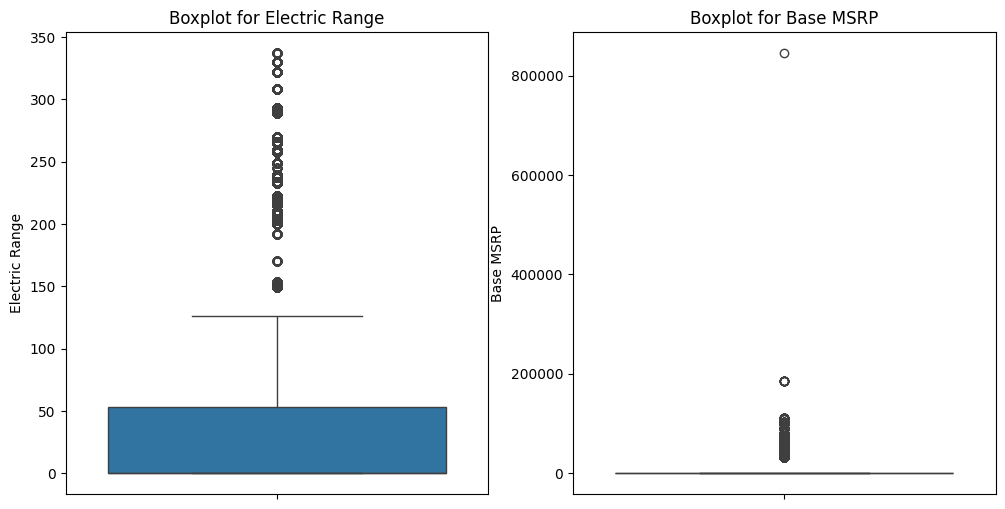

In [25]:
# Handling Outliers
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize potential outliers using boxplots
plt.figure(figsize=(12, 6))

# Boxplot for Electric Range
plt.subplot(1, 2, 1)
sns.boxplot(df_cleaned['Electric Range'])
plt.title('Boxplot for Electric Range')

# Boxplot for Base MSRP
plt.subplot(1, 2, 2)
sns.boxplot(df_cleaned['Base MSRP'])
plt.title('Boxplot for Base MSRP')

plt.show()

In [26]:
# Handling outliers: Capping outliers to the 1st and 99th percentiles
Q1 = df_cleaned['Electric Range'].quantile(0.01)
Q3 = df_cleaned['Electric Range'].quantile(0.99)
df_cleaned['Electric Range'] = df_cleaned['Electric Range'].clip(Q1, Q3)

Q1 = df_cleaned['Base MSRP'].quantile(0.01)
Q3 = df_cleaned['Base MSRP'].quantile(0.99)
df_cleaned['Base MSRP'] = df_cleaned['Base MSRP'].clip(Q1, Q3)

In [27]:
# Remove Duplicates
# Remove duplicate rows if any
df_cleaned = df_cleaned.drop_duplicates()

# Confirm no duplicates exist
print(f"Number of duplicates: {df_cleaned.duplicated().sum()}")


Number of duplicates: 0


In [28]:
# Final Data Quality Check
df_cleaned.info()
df_cleaned.describe()

# Display the first few rows of the cleaned DataFrame
df_cleaned.head()


<class 'pandas.core.frame.DataFrame'>
Index: 200040 entries, 0 to 200047
Data columns (total 16 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         200040 non-null  object 
 1   County                                             200040 non-null  object 
 2   City                                               200040 non-null  object 
 3   State                                              200040 non-null  object 
 4   Postal Code                                        200040 non-null  object 
 5   Model Year                                         200040 non-null  int64  
 6   Make                                               200040 non-null  object 
 7   Model                                              200040 non-null  object 
 8   Electric Vehicle Type                              200040 non-null  object 
 9 

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E28K,Snohomish,Mukilteo,WA,98275.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,236424583,POINT (-122.29943 47.912654),PUGET SOUND ENERGY INC,5.306104e+10
1,1C4JJXP68P,Yakima,Yakima,WA,98901.0,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0,249905295,POINT (-120.4688751 46.6046178),PACIFICORP,5.307700e+10
2,WBY8P6C05L,Kitsap,Kingston,WA,98346.0,2020,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,153,0,260917289,POINT (-122.5178351 47.7981436),PUGET SOUND ENERGY INC,5.303509e+10
3,JTDKARFP1J,Kitsap,Port Orchard,WA,98367.0,2018,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,186410087,POINT (-122.6530052 47.4739066),PUGET SOUND ENERGY INC,5.303509e+10
4,5UXTA6C09N,Snohomish,Everett,WA,98208.0,2022,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,186076915,POINT (-122.2032349 47.8956271),PUGET SOUND ENERGY INC,5.306104e+10


In [29]:
# Specify the file path where you want to save the cleaned dataset
cleaned_data_path = '/content/gdrive/My Drive/Colab Notebooks/Electiric vehical/cleaned_data.csv'

# Save the cleaned DataFrame to a CSV file
df_cleaned.to_csv(cleaned_data_path, index=False)

print(f"Cleaned dataset saved successfully to {cleaned_data_path}")


Cleaned dataset saved successfully to /content/gdrive/My Drive/Colab Notebooks/Electiric vehical/cleaned_data.csv
